In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import imp
import seaborn as sns

import sys
  
# adding utils folder to the system path
sys.path.insert(0, '../utils')
  
# importing the utils_main library as utm
import utils_main as utm

from lifetimes.utils import summary_data_from_transaction_data

In [60]:
imp.reload(utm)

<module 'utils_main' from 'C:\\Users\\BASTAMX2\\04_TargetingCustomers_DAIB\\TargetingCustomers_DAIB\\eda\\../utils\\utils_main.py'>

# Read files

In [61]:
portfolio, profile, transcript = utm.readFiles(dropUnnecessaryCol = False)

In [62]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id_promotion
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


# Hot encoding

In [63]:
portfolio_hot , profile_hot, transcript_hot = utm.oneHotEncoder(portfolio, profile, transcript, dropUnnecessaryCol = False)

In [64]:
portfolio_hot.head()

,reward,channels,difficulty,duration,offer_type,id_promotion,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0


In [69]:
profile_hot.head()

,gender,age,id_membership,became_member_on,income,year_joined,gender_F,gender_M,gender_NA,gender_O,year_joined_2013,year_joined_2014,year_joined_2015,year_joined_2016,year_joined_2017,year_joined_2018
0,NA,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,0,0,1,0,0,0,0,0,1,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,1,0,0,0,0,0,0,0,1,0
2,NA,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,0,0,1,0,0,0,0,0,0,1
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,1,0,0,0,0,0,0,0,1,0
4,NA,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,0,0,1,0,0,0,0,0,1,0


In [70]:
transcript_hot.head()

,id_membership,event,value,time,id_promotion,amount,reward_trans,offer_completed,offer_received,offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,0.0,0,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0,0,1,0


# Offers

In [94]:
imp.reload(utm)

<module 'utils_main' from 'C:\\Users\\BASTAMX2\\04_TargetingCustomers_DAIB\\TargetingCustomers_DAIB\\eda\\../utils\\utils_main.py'>

In [95]:
offers = utm.getOffers(portfolio_hot, profile_hot, transcript_hot)

In [96]:
offers.columns

Index(['id_membership', 'event', 'value', 'time', 'id_promotion', 'amount',
       'offer_completed', 'offer_received', 'offer_viewed', 'gender', 'age',
       'became_member_on', 'income', 'year_joined', 'gender_F', 'gender_M',
       'gender_NA', 'gender_O', 'year_joined_2013', 'year_joined_2014',
       'year_joined_2015', 'year_joined_2016', 'year_joined_2017',
       'year_joined_2018', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'email', 'mobile', 'social', 'web', 'bogo', 'discount',
       'informational'],
      dtype='object')

In [102]:
len(offers.columns)

36

In [97]:
offers.iloc[:, : 10].head()

,id_membership,event,value,time,id_promotion,amount,offer_completed,offer_received,offer_viewed,gender
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1.0,0.0,F
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,0.0,1.0,F
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,1.0,0.0,0.0,F
3,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1.0,0.0,M
4,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},420.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,0.0,1.0,M


In [100]:
offers.iloc[:, 20: 30].head()

,year_joined_2015,year_joined_2016,year_joined_2017,year_joined_2018,reward,channels,difficulty,duration,offer_type,email
0,0,0,1,0,5.0,"[web, email, mobile]",5.0,7.0,bogo,1.0
1,0,0,1,0,5.0,"[web, email, mobile]",5.0,7.0,bogo,1.0
2,0,0,1,0,5.0,"[web, email, mobile]",5.0,7.0,bogo,1.0
3,0,0,0,1,5.0,"[web, email, mobile]",5.0,7.0,bogo,1.0
4,0,0,0,1,5.0,"[web, email, mobile]",5.0,7.0,bogo,1.0


In [101]:
offers.iloc[:, 30 :].head()

,mobile,social,web,bogo,discount,informational
0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0


## Test

In [112]:
offers.shape

(167587, 36)

In [113]:
sum(offers.duplicated(subset=['id_promotion', 'id_membership', 'event']))

26162

In [129]:
offers_filt = offers[offers.duplicated(subset=['id_promotion', 'id_membership', 'event'])]
offers_filt

,id_membership,event,value,time,id_promotion,amount,offer_completed,offer_received,offer_viewed,gender,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
10,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1.0,0.0,M,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
11,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},438.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,0.0,1.0,M,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
15,d058f73bf8674a26a95227db098147b1,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},576.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1.0,0.0,F,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
16,d058f73bf8674a26a95227db098147b1,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},606.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,0.0,1.0,F,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
20,ebe7ef46ea6f4963a7dd49f501b26779,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},576.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1.0,0.0,M,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167489,ea31b3310cbd45b991d473514fcb7e84,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},504.0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,0.0,1.0,0.0,M,...,7.0,7.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0
167490,ea31b3310cbd45b991d473514fcb7e84,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},528.0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,0.0,0.0,1.0,M,...,7.0,7.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0
167492,ea31b3310cbd45b991d473514fcb7e84,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,546.0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,1.0,0.0,0.0,M,...,7.0,7.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0
167565,2f4973b4196e40db82756cbb0b7f0884,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576.0,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,0.0,1.0,0.0,F,...,7.0,7.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [121]:
offers_filt[offers_filt.event == "offer completed"].iloc[34]

id_membership                        7fddc08603794c7fafac15dc17d8f264
event                                                 offer completed
value               {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
time                                                            174.0
id_promotion                         9b98b8c7a33c4b65b9aebfe6a799e6d9
amount                                                            0.0
offer_completed                                                   1.0
offer_received                                                    0.0
offer_viewed                                                      0.0
gender                                                              F
age                                                                54
became_member_on                                  2017-06-22 00:00:00
income                                                        72000.0
year_joined                                                      2017
gender_F            

In [128]:
offers.query("id_membership == '7fddc08603794c7fafac15dc17d8f264' and id_promotion =='9b98b8c7a33c4b65b9aebfe6a799e6d9' ")[["id_membership", "id_promotion", "event", "time", "reward"]]

,id_membership,id_promotion,event,time,reward
896,7fddc08603794c7fafac15dc17d8f264,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,0.0,5.0
897,7fddc08603794c7fafac15dc17d8f264,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer viewed,78.0,5.0
898,7fddc08603794c7fafac15dc17d8f264,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,114.0,5.0
899,7fddc08603794c7fafac15dc17d8f264,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,168.0,5.0
900,7fddc08603794c7fafac15dc17d8f264,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,174.0,5.0
901,7fddc08603794c7fafac15dc17d8f264,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer viewed,192.0,5.0


In [111]:
# the same offer can be received and viewed multiple times
offers_mul = offers[offers.duplicated(subset=['id_promotion', 'id_membership'], keep=False)]
offers_mul.shape

(159041, 36)

## Offer conversion funnel by type

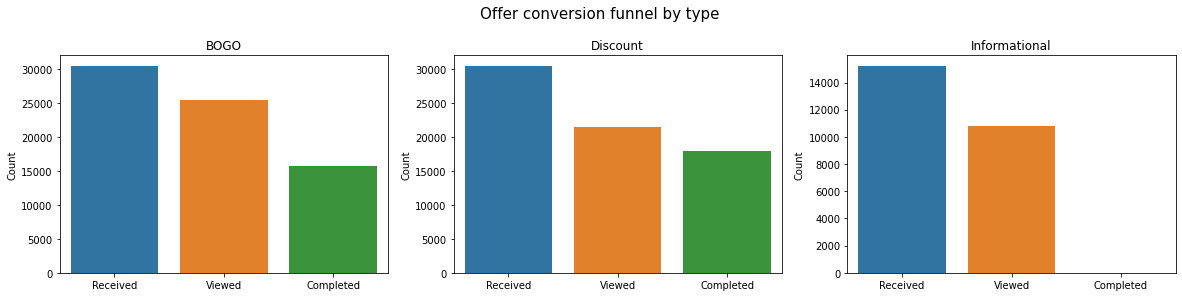

In [144]:
#sns.set_palette(sns.color_palette(starbucks))

df = offers.groupby(['event', 'offer_type'])['id_membership'].count().reset_index()
df['event'] = pd.Categorical(df['event'], ["offer received", "offer viewed", "offer completed"])
df.sort_values('event', inplace=True)

fig, axs = plt.subplots(ncols=3, figsize=(20, 4))

df['event'] = df['event'].map({'offer received': 'Received', 'offer viewed': 'Viewed', 'offer completed': 'Completed'})

ax = sns.barplot('event', y='id_membership', data=df.query('offer_type == "bogo"'), ci=None, ax=axs[0])
ax.set(xlabel='', ylabel='Count', title='BOGO')

ax = sns.barplot('event', y='id_membership', data=df.query('offer_type == "discount"'), ci=None, ax=axs[1])
ax.set(xlabel='', ylabel='Count', title='Discount')

ax = sns.barplot('event', y='id_membership', data=df.query('offer_type == "informational"'), ci=None, ax=axs[2])
ax.set(xlabel='', ylabel='Count', title='Informational')

fig.suptitle('Offer conversion funnel by type', size=15, y=1.05);

In [146]:
df

,event,offer_type,id_membership
2,Received,bogo,30499
3,Received,discount,30543
4,Received,informational,15235
5,Viewed,bogo,25449
6,Viewed,discount,21445
7,Viewed,informational,10831
0,Completed,bogo,15669
1,Completed,discount,17910


# Transactions

In [213]:
transactions, customers = utm.getTransactions(transcript_hot, profile_hot)

In [222]:
sum(transactions.amount > 50)

706

In [227]:
transactions[transactions.amount > 50].income

42         67000.0
58             NaN
113        37000.0
886        33000.0
1266       40000.0
            ...   
138236         NaN
138328     84000.0
138397     67000.0
138628    114000.0
138633     71000.0
Name: income, Length: 706, dtype: float64

In [214]:
transactions_filt = transactions[transactions.amount < 50]

In [215]:
#transactions_filt = transactions

In [216]:
transactions_filt.head()

,id_membership,event,value,time,id_promotion,amount,reward_trans,offer_completed,offer_received,offer_viewed,...,gender_M,gender_NA,gender_O,year_joined_2013,year_joined_2014,year_joined_2015,year_joined_2016,year_joined_2017,year_joined_2018,datetime
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,,0.83,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2000-01-01 12:00:00
1,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 1.44},6,,1.44,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2000-01-01 18:00:00
2,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 4.5600000000000005},12,,4.56,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2000-01-02 00:00:00
3,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 1.53},84,,1.53,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2000-01-05 00:00:00
4,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.5},90,,0.50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2000-01-05 06:00:00


In [217]:
cols_of_interest = ['id_membership', 'datetime', 'amount', 'time']

In [218]:
df = transactions_filt[cols_of_interest]
df.head()

,id_membership,datetime,amount,time
0,02c083884c7d45b39cc68e1314fec56c,2000-01-01 12:00:00,0.83,0
1,02c083884c7d45b39cc68e1314fec56c,2000-01-01 18:00:00,1.44,6
2,02c083884c7d45b39cc68e1314fec56c,2000-01-02 00:00:00,4.56,12
3,02c083884c7d45b39cc68e1314fec56c,2000-01-05 00:00:00,1.53,84
4,02c083884c7d45b39cc68e1314fec56c,2000-01-05 06:00:00,0.50,90


In [219]:
from lifetimes.plotting import *
from lifetimes.utils import *
#from lifetimes.estimation import *

data = summary_data_from_transaction_data(df, 'id_membership', 'datetime', monetary_value_col='amount')#, observation_period_end='2011-12-9')
data.head()

,frequency,recency,T,monetary_value
id_membership,,,,
0009655768c64bdeb2e877511632db8f,6.0,19.0,20.0,17.573333
00116118485d4dfda04fdbaba9a87b5c,2.0,8.0,18.0,1.695000
0011e0d4e6b944f998e987f904e8c1e5,3.0,21.0,24.0,21.990000
0020c2b971eb4e9188eac86d93036a77,6.0,28.0,28.0,29.871667
0020ccbbb6d84e358d3414a3ff76cffd,9.0,26.0,28.0,15.308889


count    16577.000000
mean         6.209025
std          3.760913
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         22.000000
Name: frequency, dtype: float64
429
2.5879230258792303


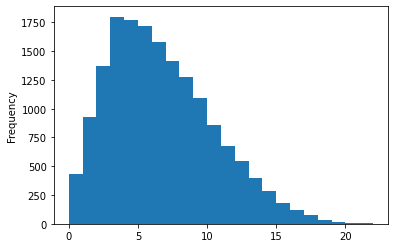

In [220]:
data['frequency'].plot(kind='hist', bins=22)
print(data['frequency'].describe())
print(sum(data['frequency'] == 0))
print(sum(data['frequency'] == 0)/float(len(data))*100)

Among all customers in our data, less than 2.6% of them have only made purchase once (no repeat).

Most of the people have bought 6 times on average

count    16577.000000
mean        13.135063
std         10.395955
min          0.000000
25%          3.428571
50%         12.011250
75%         21.530833
max         70.130000
Name: monetary_value, dtype: float64


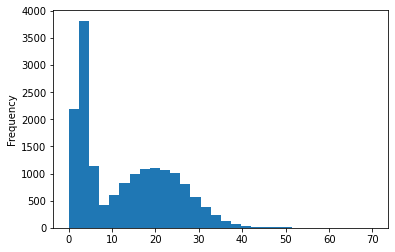

In [221]:
data['monetary_value'].plot(kind='hist', bins=30)
print(data['monetary_value'].describe())

<AxesSubplot:ylabel='Frequency'>

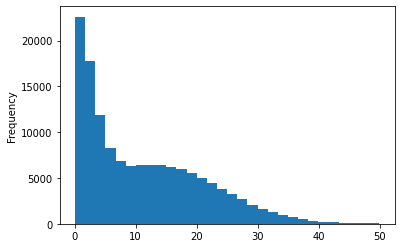

In [229]:
transactions_filt['amount'].plot(kind='hist', bins=30)

In [186]:
data[data['monetary_value'] == 594.230000]

,frequency,recency,T,monetary_value
id_membership,,,,
174fee0b94e54cc3b1904965d2fb1209,1.0,3.0,8.0,594.23


In [187]:
transactions[transactions.id_membership == "174fee0b94e54cc3b1904965d2fb1209"]

,id_membership,event,value,time,id_promotion,amount,reward_trans,offer_completed,offer_received,offer_viewed,...,gender_M,gender_NA,gender_O,year_joined_2013,year_joined_2014,year_joined_2015,year_joined_2016,year_joined_2017,year_joined_2018,datetime
138327,174fee0b94e54cc3b1904965d2fb1209,transaction,{'amount': 21.63},534,,21.63,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2000-01-23 18:00:00
138328,174fee0b94e54cc3b1904965d2fb1209,transaction,{'amount': 594.23},594,,594.23,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2000-01-26 06:00:00


In [154]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.5)
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 16578 subjects, a: 0.00, alpha: 2.59, b: 0.00, r: 0.66>


In [158]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
#plot_frequency_recency_matrix(bgf)

<Figure size 864x576 with 0 Axes>